In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all" 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Referencia para el pivot_table y el melt: http://www.informit.com/articles/article.aspx?p=2861449&seqNum=6
#Referencia para la graficación: https://datatofish.com/plot-dataframe-pandas/

weather=pd.read_csv('C:/Users/DELL/Desktop/BigData/weather.csv',low_memory=False, index_col=0)
weather.head() #Para observar la forma del DF a partir de los primeros 5 datos
weather.shape #contiene 286 filas x 35 columnas
weather=weather.drop('X',axis=1) #Se elimina la columna 'X' por lo que es aparentemente un 2do indice
weather.isnull().sum() #cuenta la cantidad de datos nulos/NaN en cada columna del DF. Siendo X31 la que más posee
#137 nulos de 286 para la columna X31
weather.info() #hay 2 columnas tipo int64 (year, month) y 32 tipo objeto
weather.isnull().sum(axis=1) #hay filas (de la 265 a la 286) que tienen 30 datos nulos de 34
weather.count(axis=1) #se re-afirma lo anterior, las filas 265 a la 286 solo tienen 4 datos útiles
#en este ciclo se cambia el nombre de las columnas 'X1' a 'X31' por sus valores numéricos correspondientes del '1' al '31'
for var in list(range(1,32)):
    st=str(var) #aquí convierte a string el número del iterador del ciclo
    stc="X"+st #se le anexa una 'X' para que concuerde con el nombre de la columna respectiva
    weather=weather.rename(columns={stc:var}) #se renombra cada columna por el valor numérico como tal
#weather.head()
#'melt()' permite cambiar la estructura del DF de formato ancho (horizontal) a largo (vertical)
#'id_vars' son las columnas que no se cambiarán, el resto de columnas pasarán a ser valores de la columna creada con el
#nombre 'var_name'. Los antiguos valores de estas columnas pasarán a ser valores de una columna llamada 'value' que se
#creará por defecto
weather_melt=pd.melt(weather,id_vars=['year','month','measure'],var_name='day',value_name='values')
weather_melt.head()
#weather_melt.tail()
#'pivot_table()' funciona practicamente al contrario que 'melt()', permitiendo cambiar la estructura del DF de formato
#largo a ancho, otorgándole el orden adecuado de observaciones y variables.
#'index' son las columnas que no cambiarán básicamente. 'columns' tomará la columna ingresada y convertirá sus valores en
#nuevas columnas con el mismo nombre que tengan. 'values' tomará los valores de la columna ingresada y los repartirá
#entre las columnas nuevas respectivamente. 'aggfunc' es una función de agregación para aplicar a los valores 
#múltiples que pueden aparecer para una posición en la tabla. El valor predeterminado es la función mean de numpy
#que espera una entrada numérica. Dado que no todos los datos son númericos, hubo que especificar una aggfunc distinta
#en este caso se usa una funcion lambda(de una sola línea) que pasa cualquier variable sin restricción (función identidad)
weather_pivot=weather_melt.pivot_table(index=['year','month','day'],columns=['measure'],aggfunc=lambda x:x)['values']
weather_pivot=weather_pivot.reset_index() #se usa el índice por defecto ya que después de aplicar el pivot el DF
#queda multi índice, y la presentación no era la esperada
weather_pivot.PrecipitationIn=weather_pivot.PrecipitationIn.replace({'T':0}) #reemplaza todas las 'T' de la columna
#PrecipitationIn a '0'
#el ciclo recorre todas las columnas del DF y convierte a numérico todas las que sean de tipo objeto menos 'Events'
for col in weather_pivot:
    if col != 'Events' and (weather_pivot[col].dtype == object):
        weather_pivot[col]=pd.to_numeric(weather_pivot[col])
weather_pivot.head()
#weather_pivot.info()
#'describe()' excluye las columnas de caracteres y proporciona estadísticas resumidas de columnas numéricas
#da los valores promedio, desviación estándar, rangos intercuartílicos, valores máximos y mínimos.
weather_pivot.describe()


,X,year,month,measure,X1,X2,X3,X4,X5,X6,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
1,1,2014,12,Max.TemperatureF,64,42,51,43,42,45,...,44,47,46,59,50,52,52,41,30,30
2,2,2014,12,Mean.TemperatureF,52,38,44,37,34,42,...,39,45,44,52,44,45,46,36,26,25
3,3,2014,12,Min.TemperatureF,39,33,37,30,26,38,...,33,42,41,44,37,38,40,30,22,20
4,4,2014,12,Max.Dew.PointF,46,40,49,24,37,45,...,39,45,46,58,31,34,42,26,10,8
5,5,2014,12,MeanDew.PointF,40,27,42,21,25,40,...,34,42,44,43,29,31,35,20,4,5


(286, 35)

year         0
month        0
measure      0
X1           6
X2          29
X3          28
X4          29
X5          30
X6          31
X7          29
X8          29
X9          27
X10         27
X11         28
X12         29
X13         31
X14         29
X15         28
X16         30
X17         30
X18         29
X19         30
X20         30
X21         27
X22         25
X23         30
X24         29
X25         28
X26         28
X27         29
X28         26
X29         52
X30         51
X31        137
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 1 to 286
Data columns (total 34 columns):
year       286 non-null int64
month      286 non-null int64
measure    286 non-null object
X1         280 non-null object
X2         257 non-null object
X3         258 non-null object
X4         257 non-null object
X5         256 non-null object
X6         255 non-null object
X7         257 non-null object
X8         257 non-null object
X9         259 non-null object
X10        259 non-null object
X11        258 non-null object
X12        257 non-null object
X13        255 non-null object
X14        257 non-null object
X15        258 non-null object
X16        256 non-null object
X17        256 non-null object
X18        257 non-null object
X19        256 non-null object
X20        256 non-null object
X21        259 non-null object
X22        261 non-null object
X23        256 non-null object
X24        257 non-null object
X25        258 non-null object
X26        258 non-null objec

1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21     10
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
       ..
257     1
258     1
259     1
260     2
261     1
262     1
263    21
264     1
265    30
266    30
267    30
268    30
269    30
270    30
271    30
272    30
273    30
274    30
275    30
276    30
277    30
278    30
279    30
280    30
281    30
282    30
283    30
284    30
285    30
286    30
Length: 286, dtype: int64

1      34
2      34
3      34
4      34
5      34
6      34
7      34
8      34
9      34
10     34
11     34
12     34
13     34
14     34
15     34
16     34
17     34
18     34
19     34
20     34
21     24
22     34
23     34
24     34
25     34
26     34
27     34
28     34
29     34
30     34
       ..
257    33
258    33
259    33
260    32
261    33
262    33
263    13
264    33
265     4
266     4
267     4
268     4
269     4
270     4
271     4
272     4
273     4
274     4
275     4
276     4
277     4
278     4
279     4
280     4
281     4
282     4
283     4
284     4
285     4
286     4
Length: 286, dtype: int64

,year,month,measure,day,values
0,2014,12,Max.TemperatureF,1,64
1,2014,12,Mean.TemperatureF,1,52
2,2014,12,Min.TemperatureF,1,39
3,2014,12,Max.Dew.PointF,1,46
4,2014,12,MeanDew.PointF,1,40


measure,year,month,day,CloudCover,Events,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,...,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees
0,2014,12,1,6,Rain,46,29.0,74,30.45,64,...,10,13,40,26,52,30.01,39,10,0.01,268
1,2014,12,2,7,Rain-Snow,40,29.0,92,30.71,42,...,8,15,27,17,51,30.40,33,2,0.10,62
2,2014,12,3,8,Rain,49,38.0,100,30.40,51,...,5,12,42,24,57,29.87,37,1,0.44,254
3,2014,12,4,3,NaN,24,33.0,69,30.56,43,...,10,12,21,13,39,30.09,30,10,0.00,292
4,2014,12,5,5,Rain,37,26.0,85,30.68,42,...,10,10,25,12,47,30.45,26,5,0.11,61


measure,year,month,day,CloudCover,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,...,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees
count,366.000000,366.000000,366.000000,366.000000,366.000000,360.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2014.915301,6.540984,15.680328,4.707650,45.475410,26.988889,85.685792,30.155328,58.931694,9.907104,...,8.860656,10.680328,38.959016,32.245902,48.308743,29.925956,43.327869,6.715847,0.101557,200.081967
std,0.278815,3.459704,8.829837,2.373206,18.317241,8.635929,49.996900,0.232095,20.047156,0.707768,...,2.065963,3.491515,19.870153,21.811639,17.414221,0.241768,18.734530,4.051196,0.294215,98.707393
min,2014.000000,1.000000,1.000000,0.000000,-6.000000,0.000000,39.000000,29.580000,18.000000,2.000000,...,-1.000000,4.000000,-11.000000,-18.000000,16.000000,29.160000,-3.000000,0.000000,0.000000,1.000000
25%,2015.000000,4.000000,8.000000,3.000000,32.000000,21.000000,73.250000,30.000000,42.000000,10.000000,...,8.000000,8.000000,24.000000,16.250000,35.000000,29.760000,30.000000,2.000000,0.000000,113.000000
50%,2015.000000,7.000000,16.000000,5.000000,47.500000,25.500000,86.000000,30.140000,60.000000,10.000000,...,10.000000,10.000000,41.000000,35.000000,46.000000,29.940000,46.000000,10.000000,0.000000,222.000000
75%,2015.000000,10.000000,23.000000,7.000000,61.000000,31.250000,93.000000,30.310000,76.000000,10.000000,...,10.000000,13.000000,56.000000,51.000000,60.000000,30.090000,60.000000,10.000000,0.040000,275.000000
max,2015.000000,12.000000,31.000000,8.000000,75.000000,94.000000,1000.000000,30.880000,96.000000,10.000000,...,10.000000,22.000000,71.000000,68.000000,96.000000,30.640000,74.000000,10.000000,2.900000,360.000000


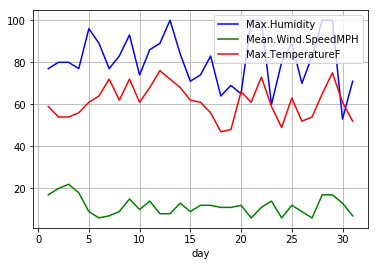

In [3]:
ax=plt.gca() #gca es get current axis, sirve para graficar las 3 lineas en la misma escala en una misma gráfica
weather_pivot[(weather_pivot['month']==10) & (weather_pivot['year']==2015)].plot(x ='day', y='Max.Humidity', grid=True, color='blue',kind = 'line', ax=ax)
weather_pivot[(weather_pivot['month']==10) & (weather_pivot['year']==2015)].plot(x ='day', y='Mean.Wind.SpeedMPH', grid=True, color='green',kind = 'line', ax=ax)
weather_pivot[(weather_pivot['month']==10) & (weather_pivot['year']==2015)].plot(x ='day', y='Max.TemperatureF', grid=True, color='red',kind = 'line', ax=ax)
plt.show()
#del gráfico se puede evidenciar como se varian la humedad máxima, la velocidad promedio del viento(MPH)
#y la temperatura máxima(°F) para los días de octubre del año 2015.
#Aunque hay alta humedad en el transcurso del mes, la temperatura máxima se mantiene bastante fresca(54-73°F ó 12-23°C)
#y con vientos que varían entre moderados(13-18mph) y fuertes(25-31mph). Podría decirse que es un mes fresco en general.